**SOAL 1**

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Menentukan style plot menggunakan seaborn
plt.style.use('seaborn-v0_8-whitegrid')
# Seaborn style pada matplotlib plot. Jenis graph lain bisa dilihat di
# https://python-graph-gallery.com/199-matplotlib-style-sheets/

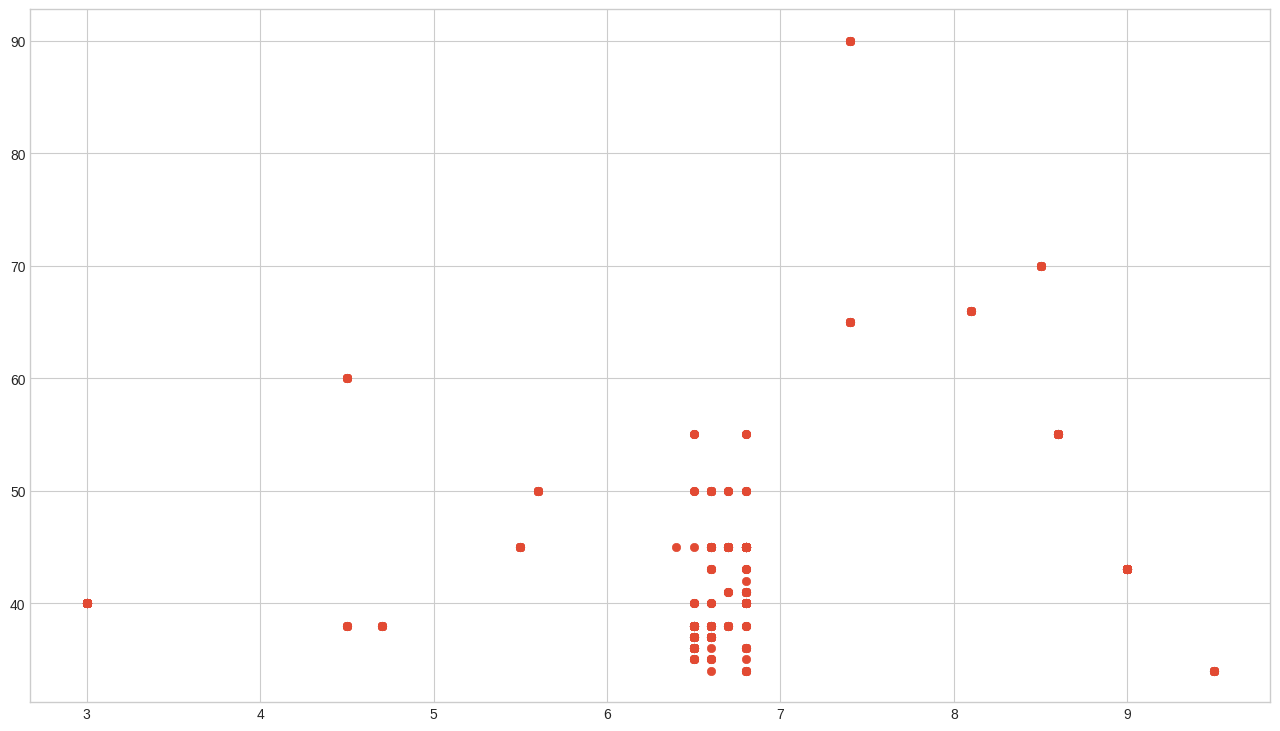

In [27]:
# Memuat dataset Iris
data = pd.read_csv('milknew.csv')

plt.plot()
plt.scatter(data['pH'], data['Temprature'])
plt.show()


In [29]:
X = np.array(list(zip(data['pH'], data['Temprature'])))
SSE = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    SSE.append(kmeanModel.inertia_)

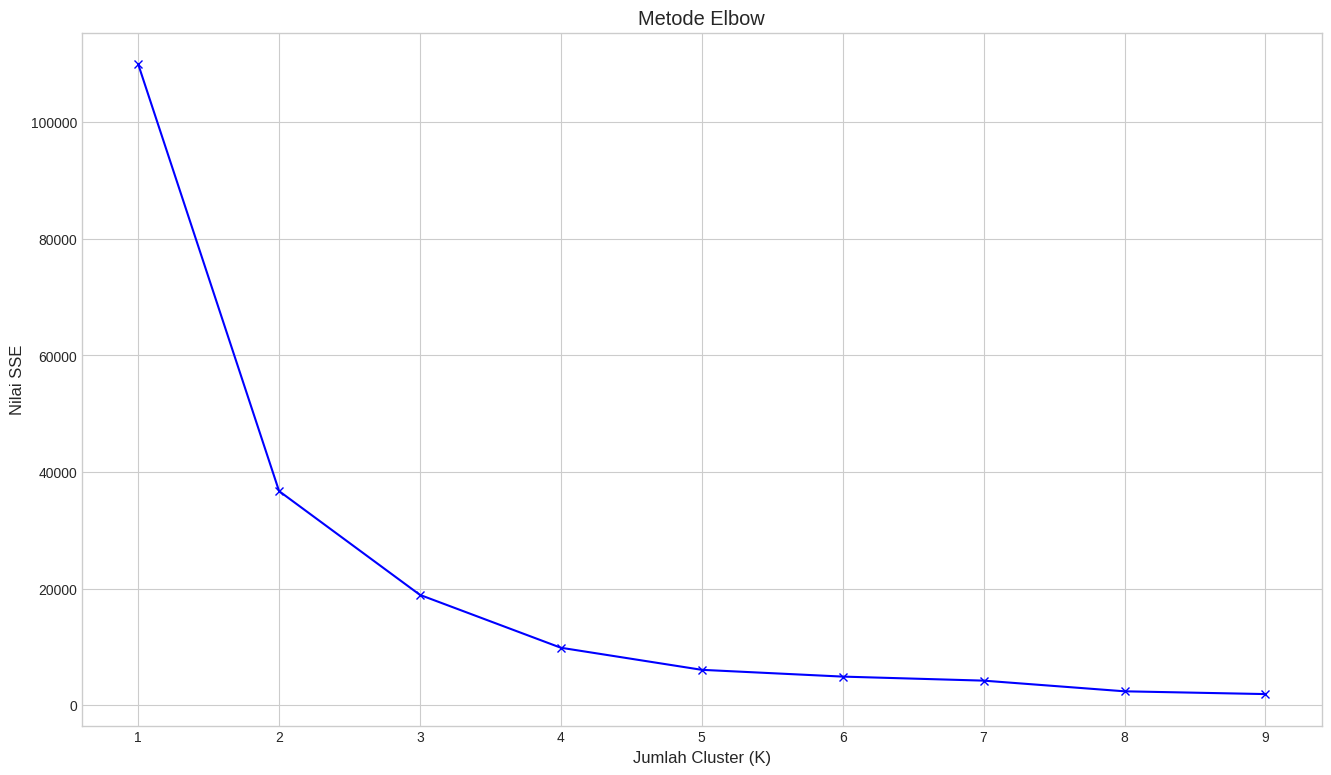

In [30]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Nilai SSE')
plt.title('Metode Elbow')
plt.show()

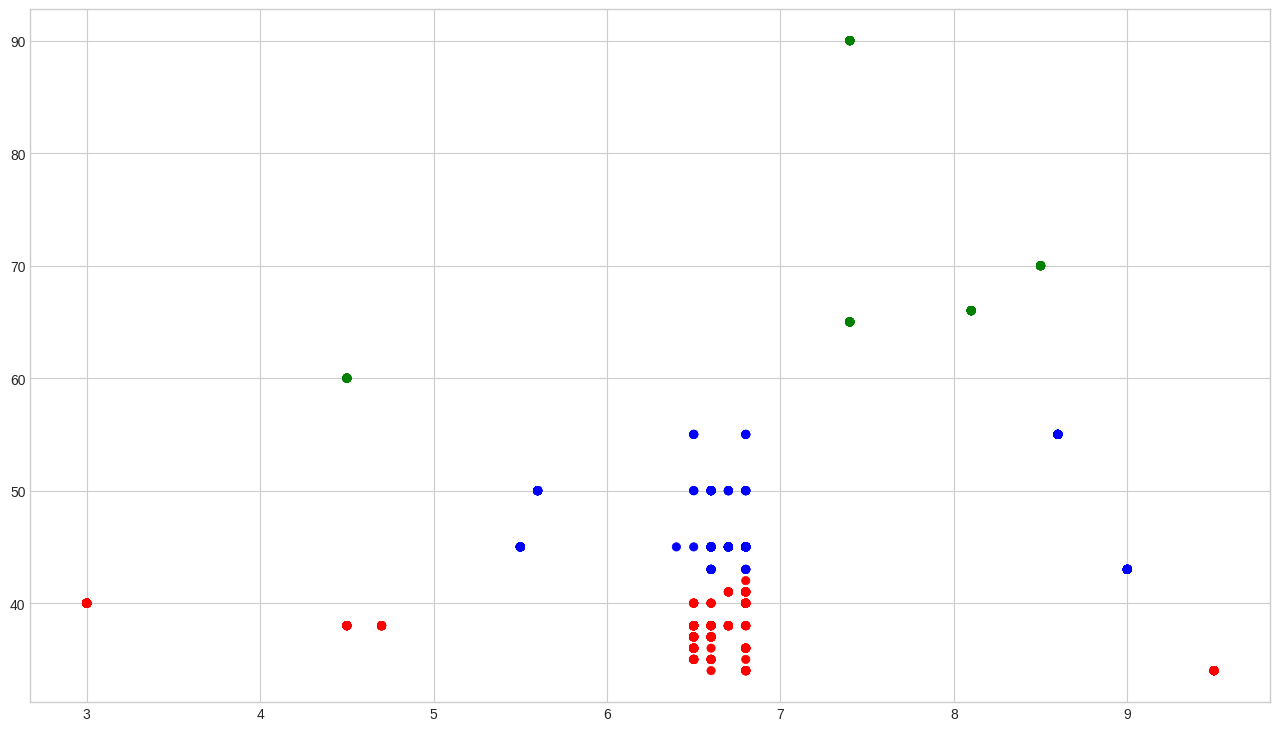

In [37]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(data['pH'], data['Temprature'], c=label_color)
plt.show()

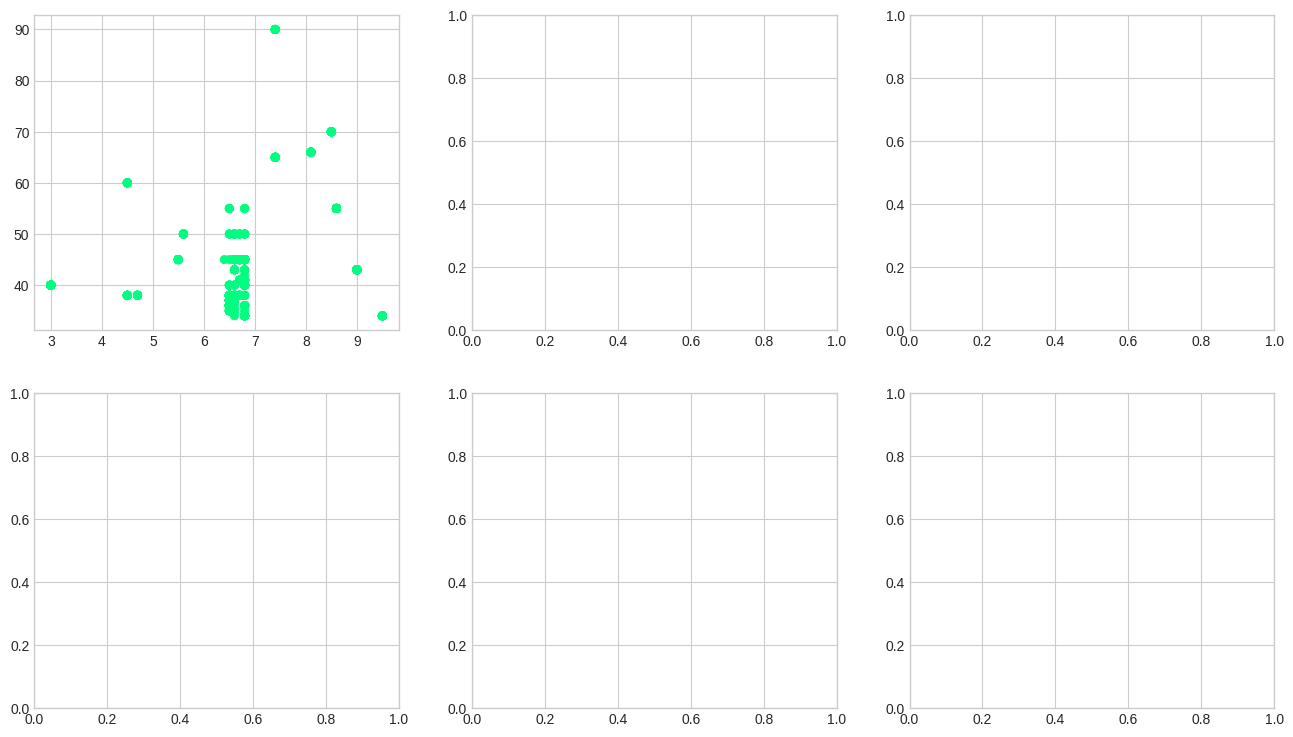

In [39]:
figure,ax=plt.subplots(2,3)
K=range(1,7)
for k in K:
  if(k<4):
    row = 0
    column = k-1
  else:
    row = 1
    column = k-4
  kmeanModel = KMeans(n_clusters=k).fit(X)
  y_pred = kmeanModel.predict(X)
  ax[row][column].scatter(data['pH'], data['Temprature'], c=y_pred, cmap='winter_r')

  plt.show()


**SOAL 2**

In [1]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import silhouette_score

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
# Memuat dataset
# Gantilah 'milknew.csv' dengan lokasi file dataset Anda
data = pd.read_csv('milknew.csv')  # Sesuaikan dengan path file Anda
print(data.shape)  # Menampilkan dimensi dataset (baris, kolom)
print(data.head(20))  # Menampilkan 20 baris pertama dari dataset

(1059, 8)
     pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0   6.6          35      1     0     1          0     254    high
1   6.6          36      0     1     0          1     253    high
2   8.5          70      1     1     1          1     246     low
3   9.5          34      1     1     0          1     255     low
4   6.6          37      0     0     0          0     255  medium
5   6.6          37      1     1     1          1     255    high
6   5.5          45      1     0     1          1     250     low
7   4.5          60      0     1     1          1     250     low
8   8.1          66      1     0     1          1     255     low
9   6.7          45      1     1     0          0     247  medium
10  6.7          45      1     1     1          0     245  medium
11  5.6          50      0     1     1          1     255     low
12  8.6          55      0     1     1          1     255     low
13  7.4          90      1     0     1          1     255     low


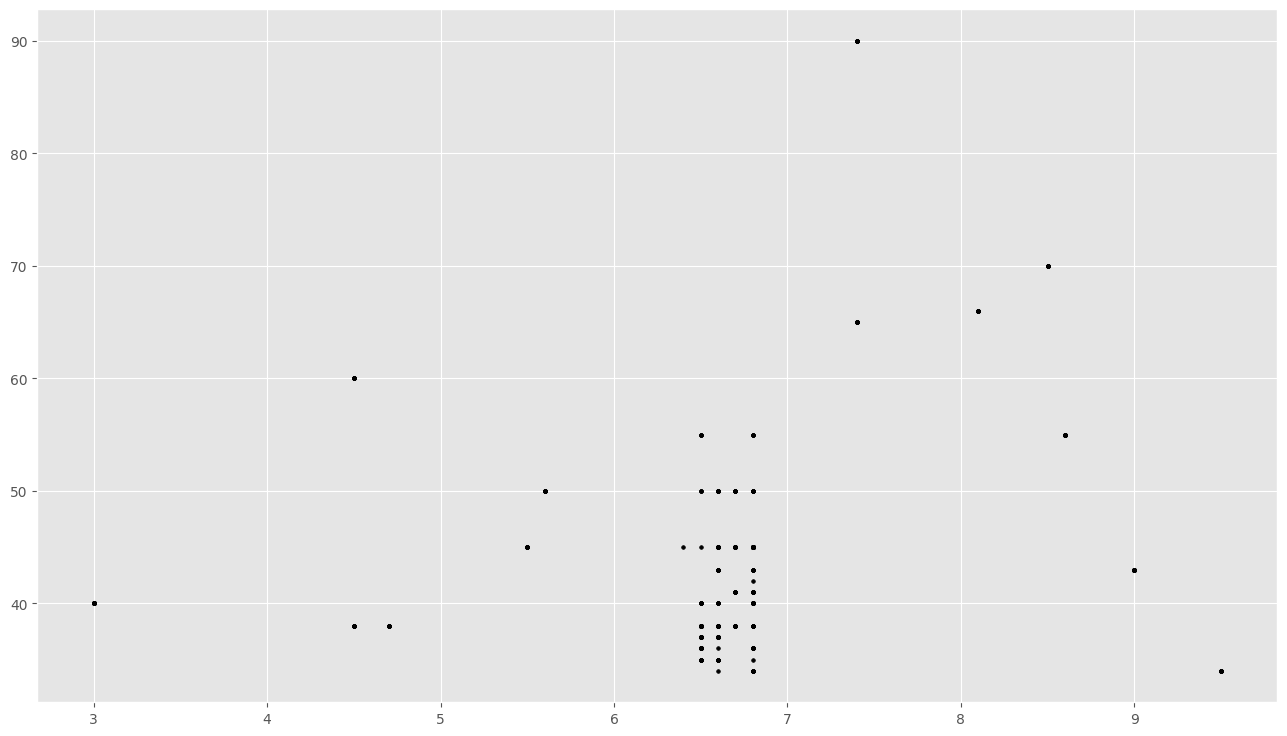

In [6]:
# KMeans clustering dalam 2D
f1 = data['pH'].values
f2 = data['Temprature'].values
X_2d = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [7]:
# Melakukan KMeans clustering dengan 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans = kmeans.fit(X_2d)
labels = kmeans.predict(X_2d)  # Mendapatkan label klaster
C = kmeans.cluster_centers_  # Mendapatkan posisi centroid klaster
print("Centroid:\n", C)

Centroid:
 [[ 6.14548736 37.84476534]
 [ 7.29126214 69.55339806]
 [ 7.12860697 46.53233831]]


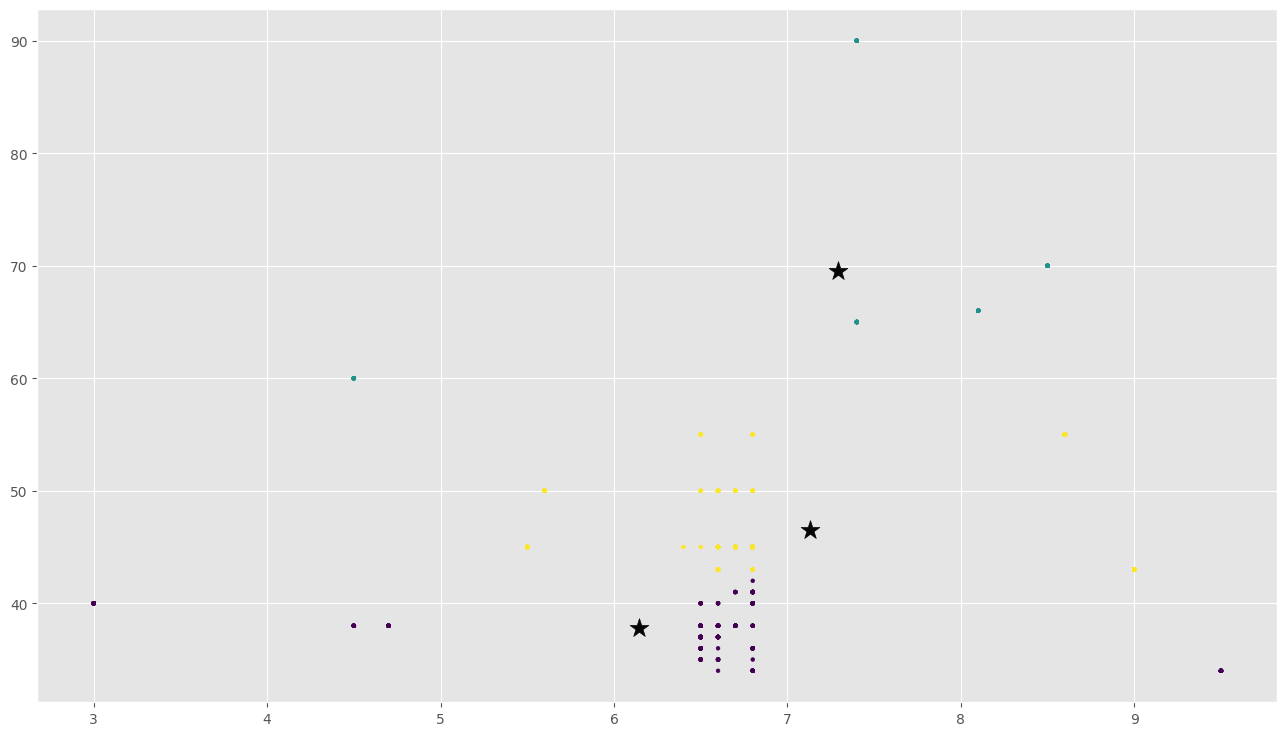

In [11]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=7, c=labels)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

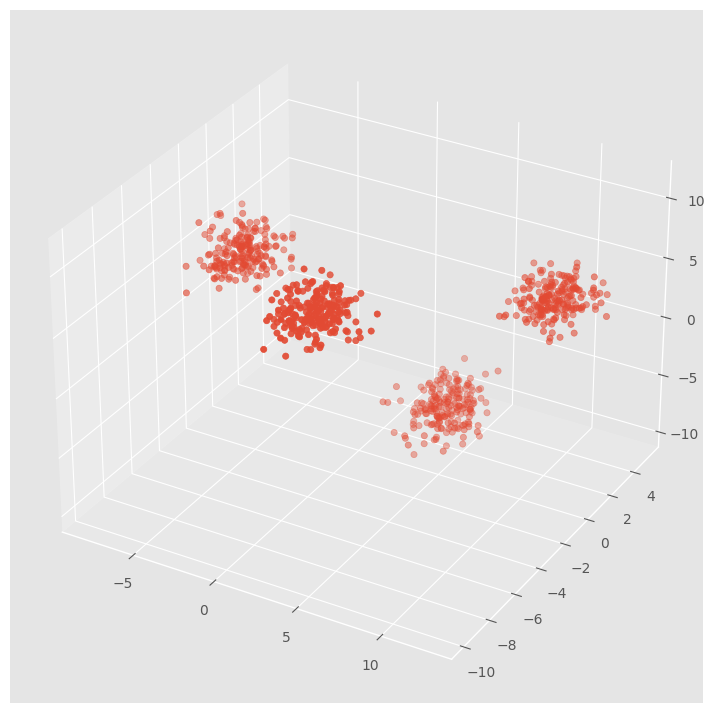

In [12]:
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])


In [13]:
# Menginisialisasi KMeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

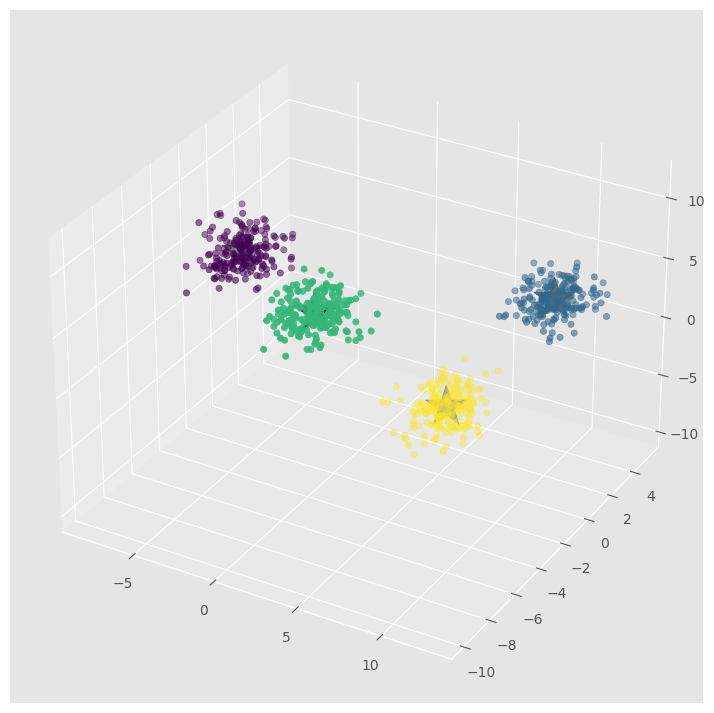

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [16]:
# Menilai jumlah cluster yang optimal
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    inertia = kmeans.inertia_
    print(f"k: {k}, cost (inertia): {inertia}")

k: 1, cost (inertia): 64778.64264094201
k: 2, cost (inertia): 25989.79926627401
k: 3, cost (inertia): 13306.944093553047
k: 4, cost (inertia): 2320.842785294794
k: 5, cost (inertia): 2190.225466973073
k: 6, cost (inertia): 2051.2723408900597
k: 7, cost (inertia): 1923.6187926261277
k: 8, cost (inertia): 1814.8166634733284
k: 9, cost (inertia): 1730.259177219185


In [18]:
silhouette_score(X, labels)

0.36337894456288544